# Chapter 10

## Question 9

Hierarchical clustering on the `USArrests` data

In [1]:
import statsmodels.api as sm
import scipy.cluster.hierarchy
import matplotlib.pyplot as plt

import sklearn.preprocessing

In [2]:
usarrests = sm.datasets.get_rdataset("USArrests", "datasets").data
usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

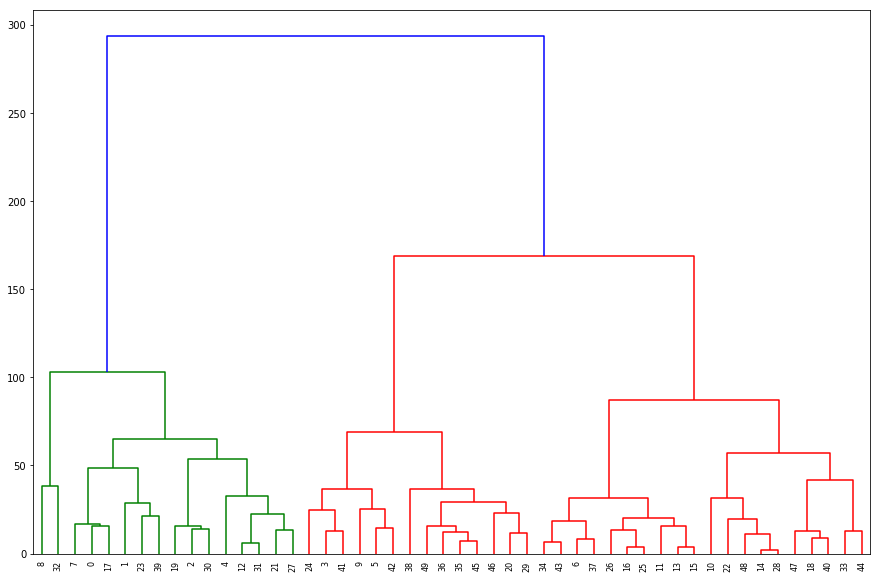

In [3]:
Z = scipy.cluster.hierarchy.linkage(usarrests, method="complete", metric="Euclidean")

fig, ax = plt.subplots(figsize=(15,10))
dendro = scipy.cluster.hierarchy.dendrogram(Z, ax=ax)


### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states are in which cluster?

In [4]:
three_clusters = scipy.cluster.hierarchy.cut_tree(Z, n_clusters=3).ravel()
cluster_membership = [usarrests.index[three_clusters == i] for i in range(3)]
print("\n".join(repr(x) for x in cluster_membership))

Index(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida',
       'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi',
       'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina'],
      dtype='object')
Index(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'],
      dtype='object')
Index(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota',
       'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype='object')


### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

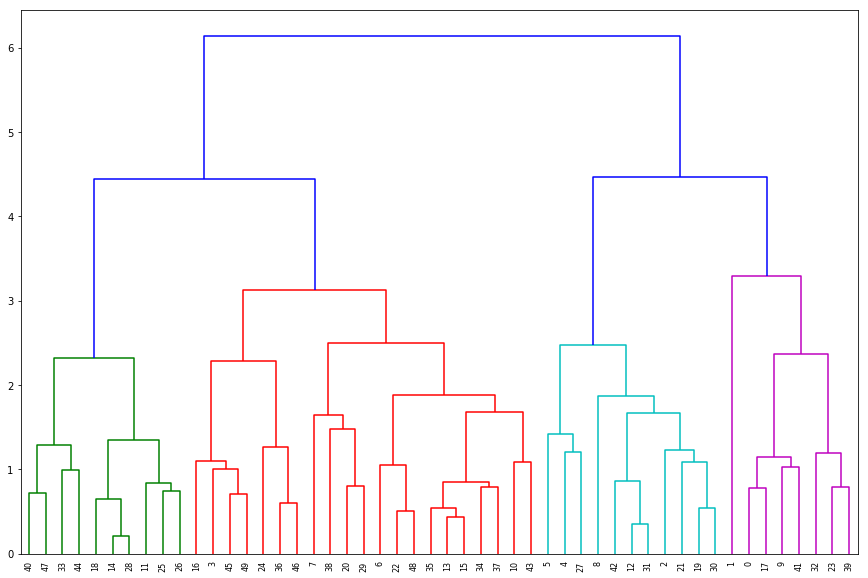

In [5]:
Z = scipy.cluster.hierarchy.linkage(sklearn.preprocessing.StandardScaler(with_mean=False).fit_transform(usarrests),
                                    method="complete", metric="Euclidean")

fig, ax = plt.subplots(figsize=(15,10))
dendro = scipy.cluster.hierarchy.dendrogram(Z, ax=ax)


### (d) What effect does scaling the variables have on the hierarchical clustering? Should be variables be scaled, or not?

In [6]:
three_clusters = scipy.cluster.hierarchy.cut_tree(Z, n_clusters=3).ravel()
cluster_membership = [usarrests.index[three_clusters == i] for i in range(3)]
print("\n".join(repr(x) for x in cluster_membership))

Index(['Alabama', 'Alaska', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'South Carolina', 'Tennessee'],
      dtype='object')
Index(['Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland',
       'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas'],
      dtype='object')
Index(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota',
       'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')


The dendrograms change quite drastically - The variables should indeed probably be scaled, since the standard deviation in `Assault` is significantly higher than the other features (see below). Without scaling, `Assault` will dominate the distance measure, which probably isn't what you want. 

In [7]:
usarrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000
